In [1]:
%pip install -q python-dotenv langchain-openai

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_openai import ChatOpenAI

query = '인프런에는 어떤 강의가 있나요?'

llm = ChatOpenAI(model='gpt-4o-mini')
llm.invoke(query)

AIMessage(content='인프런(Infront)은 다양한 온라인 강의를 제공하는 플랫폼으로, 주로 IT, 프로그래밍, 데이터 분석, 디자인, 마케팅 등 여러 분야의 강의를 포함하고 있습니다. 예를 들어, 다음과 같은 강의들이 있을 수 있습니다:\n\n1. **프로그래밍**: Python, Java, C++, 웹 개발 관련 강의\n2. **데이터 분석**: 데이터 시각화, SQL, 머신러닝 관련 강의\n3. **디자인**: UI/UX 디자인, 그래픽 디자인 관련 강의\n4. **마케팅**: 디지털 마케팅, 소셜 미디어 마케팅 관련 강의\n5. **기타**: IT 자격증 준비, 클라우드 컴퓨팅, DevOps 관련 강의 등\n\n각 분야별로 초급부터 고급 과정까지 다양한 수준의 강의가 제공되며, 강의는 주로 동영상 형식으로 진행됩니다. 최신 강의 정보는 인프런 웹사이트를 방문하여 확인하실 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 218, 'prompt_tokens': 18, 'total_tokens': 236, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BivLsiqHOu8rZyAbRonNAIxJGQDHU', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None

In [5]:
%pip install -q langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
	messages: list[AnyMessage, add_messages]

In [7]:
from langgraph.graph import Graph, StateGraph

graph_builder = StateGraph(AgentState)

In [8]:
def generate(state: AgentState) -> AgentState:
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

In [9]:
from langgraph.graph import START, END
graph_builder.add_node('generate', generate)

In [10]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [12]:
graph = graph_builder.compile()

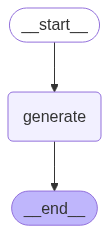

In [13]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))